In [ ]:
import pandas as pd

In [ ]:
ab_assignment = pd.read_csv('/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/ab_assignment.csv')
campaigns = pd.read_csv('/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/campaigns.csv')
chat_events = pd.read_csv('/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/chat_events.csv')
event_logs = pd.read_csv('/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/event_logs.csv')
payment_transactions = pd.read_csv('/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/payment_transactions.csv')
plan_history = pd.read_csv('/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/plan_history.csv')
push_events = pd.read_csv('/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/push_events.csv')
referral_events = pd.read_csv('/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/referral_events.csv')
users = pd.read_csv('/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/users.csv')

In [ ]:
ab_assignment
campaigns
chat_events
event_logs
payment_transactions
plan_history
push_events
referral_events
users

,assignment_id,user_id,experiment_id,experiment_name,variant,assigned_at
0,ab_c87e6ef83a01,usr_fe5b5c4844cb,exp_202501,pricing_ab,A,2025-05-01 04:30:48
1,ab_43ea9eae6ffd,usr_081b7e4e7569,exp_202501,pricing_ab,A,2025-05-01 03:50:23
2,ab_c1b1dcfe7e39,usr_6d79daab8e89,exp_202501,pricing_ab,B,2025-05-01 23:09:59
3,ab_64433e3f7806,usr_582bbacbd485,exp_202501,pricing_ab,B,2025-05-01 23:08:32
4,ab_d1235d742468,usr_f69b37b87079,exp_202501,pricing_ab,A,2025-05-01 22:55:36
...,...,...,...,...,...,...
1412,ab_0cc93a223242,usr_9619dad3a150,exp_202503,checkout_design,redesign,2025-07-21 03:26:17
1413,ab_39109e640637,usr_7f238df0fde2,exp_202503,checkout_design,redesign,2025-07-21 00:17:00
1414,ab_4a45a5f6b2e6,usr_75b412488b44,exp_202503,checkout_design,redesign,2025-07-21 23:01:15
1415,ab_9ac65ea25fca,usr_49c3e69168e0,exp_202503,checkout_design,redesign,2025-07-21 18:46:06


In [ ]:
merged1 = pd.merge(chat_events, users, on='user_id', how='inner')
merged2 = pd.merge(payment_transactions,plan_history, on='user_id', how='inner')
merged3 = pd.merge(payment_transactions, users, on='user_id', how='inner')

In [ ]:
merged1.head()

,chat_id,user_id,sent_at,tag,emotion,channel,status,created_at,last_seen_at,email,...,plan_status,device_type,plan_start_date,plan_end_date,gender,age_group,age,campaign_id,utm_source,utm_campaign
0,chat_d678903d6e,usr_d9957640e673,2025-04-01 12:39:32,Error,negative,web,open,2025-01-23 07:56:00,2025-07-18 18:22:00,yuseoyeong@example.net,...,active,web,2025-02-01 07:56:00,NaN,M,20s,20,cmp_002,referral,ref_buddy
1,chat_a4a7c3a003,usr_53edf6429808,2025-04-01 13:59:07,Other,negative,in_app,in_progress,2024-12-19 15:13:00,2025-05-28 20:08:00,noyeweon@example.net,...,canceled,ios,2024-12-21 15:13:00,2025-01-20 15:13:00,F,30s,30,cmp_002,referral,ref_buddy
2,chat_086533804d,usr_b3b6d07c5a6a,2025-04-01 10:48:29,Feature Suggestion,neutral,email,in_progress,2024-12-18 18:55:00,2025-07-12 15:33:00,tgim@example.org,...,none,android,NaN,NaN,F,50s,57,cmp_001,facebook,spring24
3,chat_a52fea733c,usr_f14a5d9a25cc,2025-04-01 03:58:33,Other,neutral,in_app,in_progress,2025-02-10 10:13:00,2025-07-20 04:58:00,caminseo@example.com,...,active,web,2025-02-16 10:13:00,NaN,M,30s,32,cmp_002,referral,ref_buddy
4,chat_f84a34f30f,usr_a933fb6930fa,2025-04-01 04:11:18,Learning,neutral,in_app,in_progress,2025-02-26 03:36:00,2025-05-21 17:48:00,migyeong25@example.org,...,canceled,web,2025-03-01 03:36:00,2025-03-31 03:36:00,F,60s,87,cmp_002,referral,ref_buddy


In [ ]:
# 연령대 구간 나누기
users['age_group'] = pd.cut(
    users['age'],
    bins=[0, 19, 29, 39, 49, 59, 69, 120],
    labels=['10대 이하', '20대', '30대', '40대', '50대', '60대', '70대 이상']
)

# 연령대별 인원 수 집계
age_counts = users['age_group'].value_counts().sort_index()
print(age_counts)


age_group
10대 이하    3736
20대       3891
30대       3676
40대       3804
50대       3713
60대        616
70대 이상    3109
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
signup_users = set(users['user_id'])

# 앱 실행 단계: push_events.csv
active_users = set(push_events['user_id'])

# 결제 단계: payment_transactions.csv
paid_users = set(payment_transactions['user_id'])

# 각 단계별 사용자 수
funnel_data = {
    '단계': ['가입', '앱 실행', '결제'],
    '사용자 수': [
        len(signup_users),
        len(signup_users & active_users),
        len(signup_users & active_users & paid_users)
    ]
}

funnel_df = pd.DataFrame(funnel_data)

# 전환율 계산
funnel_df['전환율(%)'] = (funnel_df['사용자 수'] / funnel_df['사용자 수'].iloc[0] * 100).round(2)

funnel_df

,단계,사용자 수,전환율(%)
0,가입,22545,100.00
1,앱 실행,4339,19.25
2,결제,1719,7.62


In [ ]:
event_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717365 entries, 0 to 717364
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           717365 non-null  object
 1   session_id        717365 non-null  object
 2   event_name        717365 non-null  object
 3   event_timestamp   717365 non-null  object
 4   event_properties  717365 non-null  object
 5   device_type       717365 non-null  object
 6   location          717365 non-null  object
dtypes: object(7)
memory usage: 38.3+ MB


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22545 entries, 0 to 22544
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   user_id             22545 non-null  object  
 1   created_at          22545 non-null  object  
 2   last_seen_at        22545 non-null  object  
 3   email               22545 non-null  object  
 4   acquisition_source  22545 non-null  object  
 5   subscription_plan   22545 non-null  object  
 6   plan_status         22545 non-null  object  
 7   device_type         22545 non-null  object  
 8   plan_start_date     7625 non-null   object  
 9   plan_end_date       451 non-null    object  
 10  gender              22545 non-null  object  
 11  age_group           22545 non-null  category
 12  age                 22545 non-null  int64   
 13  campaign_id         22545 non-null  object  
 14  utm_source          22545 non-null  object  
 15  utm_campaign        22545 non-null  

In [ ]:
users.groupby

In [ ]:
!pip install matplotlib
!pip install seaborn

In [ ]:
!pip install koreanize-matplotlib

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lo

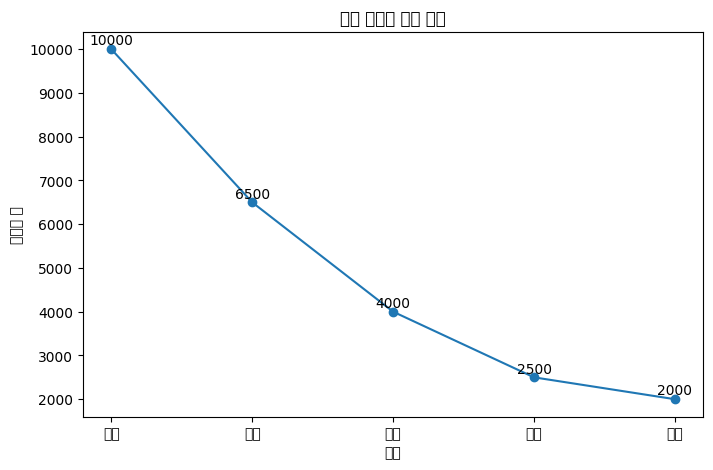

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 예시 데이터
funnel_data = {
    '단계': ['유입', '탐색', '경험', '관여', '구매'],
    '사용자 수': [10000, 6500, 4000, 2500, 2000]
}
df = pd.DataFrame(funnel_data)
df['전환율(%)'] = (df['사용자 수'] / df['사용자 수'].iloc[0] * 100).round(2)

# 시각화
plt.figure(figsize=(8,5))
plt.plot(df['단계'], df['사용자 수'], marker='o')
plt.title('교육 서비스 퍼널 예시')
plt.xlabel('단계')
plt.ylabel('사용자 수')
for i, v in enumerate(df['사용자 수']):
    plt.text(i, v+100, str(v), ha='center')
plt.show()


In [ ]:
!pip install koreanize-matplotlib

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
%matplotlib inline

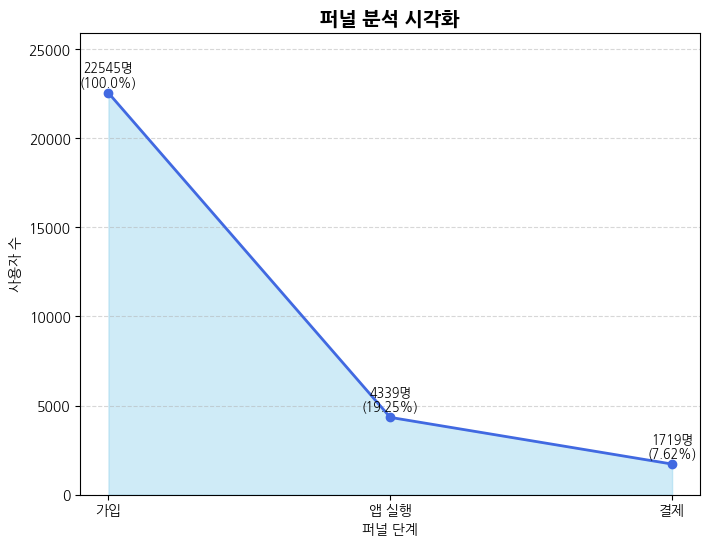

In [ ]:
# 혹시 모를 데이터 타입 문제 방지 - numpy array로 변환
import numpy as np

x = np.arange(len(funnel_df))
y = funnel_df['사용자 수'].astype(float).to_numpy()

plt.figure(figsize=(8,6))
plt.plot(x, y, marker='o', linewidth=2, color='royalblue')
plt.fill_between(x, y, color='skyblue', alpha=0.4)

# 데이터 라벨 표시
for i, row in enumerate(funnel_df.itertuples()):
    plt.text(i, row._2 + max(y) * 0.01,
             f"{row._2}명\n({row._3}%)",
             ha='center', va='bottom', fontsize=9)

plt.xticks(x, funnel_df['단계'])
plt.title('퍼널 분석 시각화', fontsize=14, fontweight='bold')
plt.xlabel('퍼널 단계')
plt.ylabel('사용자 수')
plt.ylim(0, max(y) * 1.15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [ ]:
chat_events

,chat_id,user_id,sent_at,tag,emotion,channel,status
0,chat_d678903d6e,usr_d9957640e673,2025-04-01 12:39:32,Error,negative,web,open
1,chat_a4a7c3a003,usr_53edf6429808,2025-04-01 13:59:07,Other,negative,in_app,in_progress
2,chat_086533804d,usr_b3b6d07c5a6a,2025-04-01 10:48:29,Feature Suggestion,neutral,email,in_progress
3,chat_a52fea733c,usr_f14a5d9a25cc,2025-04-01 03:58:33,Other,neutral,in_app,in_progress
4,chat_f84a34f30f,usr_a933fb6930fa,2025-04-01 04:11:18,Learning,neutral,in_app,in_progress
...,...,...,...,...,...,...,...
2120,chat_b17550a1b9,usr_bfce4d4e23e8,2025-07-21 08:50:30,Account,neutral,web,open
2121,chat_f78e01a81a,usr_b3adc3eed263,2025-07-21 10:43:46,Other,neutral,web,open
2122,chat_19e2edbd54,usr_443fcd375ed0,2025-07-21 19:59:49,Payment,neutral,kakao,closed
2123,chat_95fc8273de,usr_5b095d08bc14,2025-07-21 03:35:32,Other,negative,kakao,open


In [ ]:
emotion_counts = chat_events.groupby('emotion')['user_id'].count().reset_index(name='count')

print(emotion_counts)

    emotion  count
0  negative    732
1   neutral    702
2  positive    691


In [ ]:
# 페르소나 설정
# 취업준비생 : 아무래도 대학생부터 취준생들의 나이인 20대가 제일 대표성을 띌 수 있지 않을까 함

In [ ]:
merged3

,payment_id,user_id,event_time,plan_name,amount,method,status,created_at,last_seen_at,email,...,plan_status,device_type,plan_start_date,plan_end_date,gender,age_group,age,campaign_id,utm_source,utm_campaign
0,pay_d8b42511fe51,usr_182a54666833,2025-04-01 00:00:00,annual_basic,99.99,apple,success,2024-12-28 21:34:00,2025-07-06 09:21:00,yeongjabae@example.com,...,active,ios,2025-04-01,NaN,F,60s,88,cmp_001,facebook,spring24
1,pay_38bfe6505146,usr_48262cef2493,2025-04-01 00:00:00,monthly_basic,9.99,naver,success,2024-12-27 20:22:00,2025-07-11 12:14:00,iminseo@example.net,...,active,android,2025-04-01,NaN,M,30s,30,cmp_002,referral,ref_buddy
2,pay_dfe9e467a1a5,usr_74ff4071a3e2,2025-04-01 00:00:00,annual_basic,99.99,naver,success,2025-01-27 14:25:00,2025-07-16 22:24:00,eunju99@example.com,...,active,web,2025-04-01,NaN,F,60s,110,cmp_001,facebook,spring24
3,pay_55e6c5b83491,usr_385b38c519a3,2025-04-01 00:00:00,annual_basic,99.99,kakao,success,2024-12-15 06:26:00,2025-07-19 18:47:00,jaehyeon96@example.net,...,active,android,2025-04-01,NaN,F,10s,17,cmp_002,referral,ref_buddy
4,pay_592bc3d90809,usr_4dcde0d33183,2025-04-01 00:00:00,annual_pro,199.99,paypal,success,2024-12-12 22:44:00,2025-07-16 04:17:00,ogjasim@example.org,...,active,android,2025-04-01,NaN,M,60s,101,cmp_003,google,sem24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5662,pay_625274f0d7f2,usr_03d89ca4b544,2025-07-21 00:00:00,monthly_basic,9.99,apple,success,2025-06-18 05:36:54,2025-07-21 00:18:00,gimyeonghwan@example.net,...,active,ios,2025-07-21,NaN,M,20s,28,cmp_001,facebook,spring24
5663,pay_e749e34bb2f4,usr_b5aaa0a472e2,2025-07-21 00:00:00,annual_pro,199.99,card,success,2025-07-13 04:55:48,2025-07-21 15:22:00,kgim@example.com,...,active,web,2025-07-21,NaN,M,30s,35,cmp_003,google,sem24
5664,pay_af95c7bddf18,usr_1b12e00ddd1f,2025-07-21 00:00:00,monthly_pro,19.99,card,success,2025-07-05 03:00:22,2025-07-21 19:48:00,yunseo15@example.org,...,active,ios,2025-07-21,NaN,M,60s,104,cmp_002,referral,ref_buddy
5665,pay_0c62c39745b7,usr_2cf9b0a3dc33,2025-07-21 00:00:00,annual_basic,99.99,kakao,success,2025-07-06 19:18:13,2025-07-21 16:07:00,jeongsug97@example.net,...,active,android,2025-07-21,NaN,F,30s,35,cmp_001,facebook,spring24


In [ ]:
import pandas as pd

# 다시 데이터 불러오기
files = {
    "users": "/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/users.csv",
    "referral_events": "/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/referral_events.csv",
    "push_events": "/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/push_events.csv",
    "event_logs": "/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/event_logs.csv",
    "plan_history": "/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/plan_history.csv",
    "payment_transactions": "/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/payment_transactions.csv",
    "chat_events": "/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/chat_events.csv",
    "campaigns": "/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/campaigns.csv",
    "ab_assignment": "/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/ab_assignment.csv"
}

dfs = {}
for name, path in files.items():
    dfs[name] = pd.read_csv(path)

# 간단한 집계로 유저 특징 요약
users_df = dfs["users"]
payments_df = dfs["payment_transactions"]
events_df = dfs["event_logs"]
push_df = dfs["push_events"]

# 1. 유입 경로별 사용자 수
acquisition_counts = users_df["acquisition_source"].value_counts()

# 2. 구독 플랜별 사용자 수
plan_counts = users_df["subscription_plan"].value_counts()

# 3. 결제 상태별 결제 건수
payment_status_counts = payments_df["status"].value_counts()

# 4. 기기 유형별 사용자 수
device_counts = users_df["device_type"].value_counts()

# 5. 푸시 알림 오픈율
push_open_rate = push_df["opened"].mean()

summary_easy = {
    "유입경로별_유저수": acquisition_counts.to_dict(),
    "구독플랜별_유저수": plan_counts.to_dict(),
    "결제상태별_건수": payment_status_counts.to_dict(),
    "기기유형별_유저수": device_counts.to_dict(),
    "전체_푸시오픈율": round(push_open_rate * 100, 2)
}

summary_easy


{'유입경로별_유저수': {'organic': 4617,
  'google_cpc': 4608,
  'referral': 4506,
  'facebook_ads': 4431,
  'direct': 4383},
 '구독플랜별_유저수': {'none': 14920,
  'annual_basic': 1948,
  'monthly_basic': 1926,
  'monthly_pro': 1896,
  'annual_pro': 1855},
 '결제상태별_건수': {'success': 5667},
 '기기유형별_유저수': {'web': 7585, 'ios': 7547, 'android': 7413},
 '전체_푸시오픈율': np.float64(50.56)}

In [ ]:
# 유입 경로별 유저 수
# organic: 4,617명
# google_cpc: 4,608명
# referral: 4,506명
# facebook_ads: 4,431명
# direct: 4,383명

# 구독 플랜별 유저 수
# none(무료/미가입): 14,920명
# annual_basic: 1,948명
# monthly_basic: 1,926명
# monthly_pro: 1,896명
# annual_pro: 1,855명

# 결제 상태별 건수
# 성공(success)만 기록: 5,667건
# 기기 유형별 유저 수
# web: 7,585명
# iOS: 7,547명
# Android: 7,413명

# 전체 푸시 알림 오픈율
# 50.56%

# 절반 이상이 무료 상태이고, 유입 경로와 기기 비중이 고르게 분포하며, 푸시 오픈율은 50% 수준

In [ ]:
# 연령대별 유저 수
age_group_counts = users_df.groupby("age_group")["user_id"].count()

# 성별별 유저 수
gender_counts = users_df.groupby("gender")["user_id"].count()

# 연령대 + 성별별 유저 수
age_gender_counts = users_df.groupby(["age_group", "gender"])["user_id"].count()

# 연령대별 구독 플랜 분포
age_plan_counts = users_df.groupby(["age_group", "subscription_plan"])["user_id"].count().unstack(fill_value=0)

# 성별별 구독 플랜 분포
gender_plan_counts = users_df.groupby(["gender", "subscription_plan"])["user_id"].count().unstack(fill_value=0)

summary_age_gender = {
    "연령대별_유저수": age_group_counts.to_dict(),
    "성별별_유저수": gender_counts.to_dict(),
    "연령대_성별별_유저수": age_gender_counts.to_dict(),
    "연령대별_구독플랜": age_plan_counts.to_dict(),
    "성별별_구독플랜": gender_plan_counts.to_dict()
}

summary_age_gender


{'연령대별_유저수': {'10s': 3736,
  '20s': 3891,
  '30s': 3676,
  '40s': 3804,
  '50s': 3713,
  '60s': 3725},
 '성별별_유저수': {'F': 11339, 'M': 11206},
 '연령대_성별별_유저수': {('10s', 'F'): 1869,
  ('10s', 'M'): 1867,
  ('20s', 'F'): 1965,
  ('20s', 'M'): 1926,
  ('30s', 'F'): 1907,
  ('30s', 'M'): 1769,
  ('40s', 'F'): 1892,
  ('40s', 'M'): 1912,
  ('50s', 'F'): 1824,
  ('50s', 'M'): 1889,
  ('60s', 'F'): 1882,
  ('60s', 'M'): 1843},
 '연령대별_구독플랜': {'annual_basic': {'10s': 312,
   '20s': 329,
   '30s': 302,
   '40s': 347,
   '50s': 342,
   '60s': 316},
  'annual_pro': {'10s': 291,
   '20s': 351,
   '30s': 332,
   '40s': 306,
   '50s': 294,
   '60s': 281},
  'monthly_basic': {'10s': 326,
   '20s': 337,
   '30s': 334,
   '40s': 324,
   '50s': 315,
   '60s': 290},
  'monthly_pro': {'10s': 319,
   '20s': 299,
   '30s': 289,
   '40s': 316,
   '50s': 325,
   '60s': 348},
  'none': {'10s': 2488,
   '20s': 2575,
   '30s': 2419,
   '40s': 2511,
   '50s': 2437,
   '60s': 2490}},
 '성별별_구독플랜': {'annual_basic': {'F'

In [ ]:
# 연령대나 성별은 비슷해서 특징이 없다시피 함

In [ ]:
!pip install matplotlib
!pip install seaborn

In [ ]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 36.4 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
%matplotlib inline

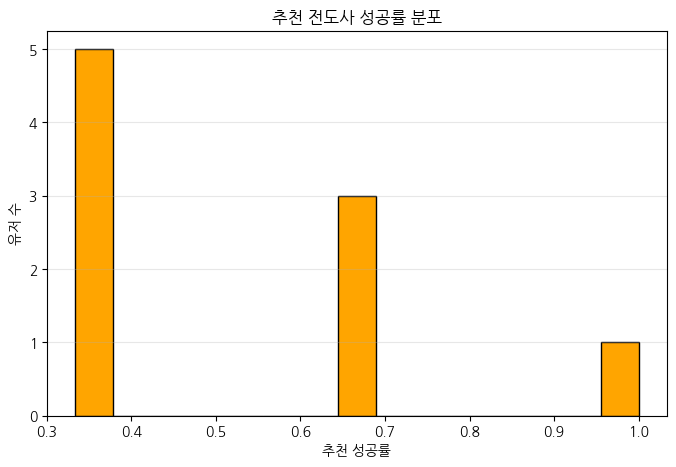

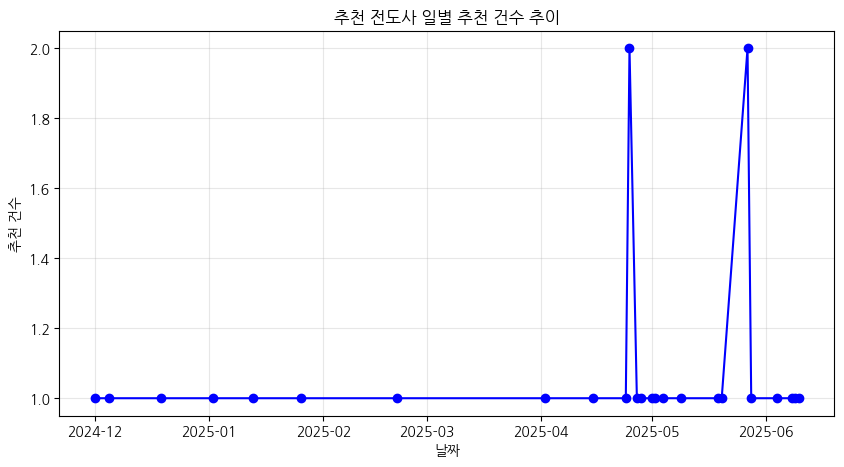

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Colab 환경의 파일 경로 정의
files = {
    "users": "/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/users.csv",
    "referral_events": "/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/referral_events.csv",
    "push_events": "/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/push_events.csv",
    "event_logs": "/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/event_logs.csv",
    "plan_history": "/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/plan_history.csv",
    "payment_transactions": "/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/payment_transactions.csv",
    "chat_events": "/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/chat_events.csv",
    "campaigns": "/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/campaigns.csv",
    "ab_assignment": "/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/ab_assignment.csv"
}

# 2. CSV 불러오기
dfs = {name: pd.read_csv(path) for name, path in files.items()}

users_df = dfs["users"]
referral_df = dfs["referral_events"]
payments_df = dfs["payment_transactions"]

# 3. 추천 전도사 세그먼트 추출
referral_counts = referral_df.groupby("referrer_user_id")["referred_user_id"].count().reset_index()
referral_counts.columns = ["user_id", "referral_count"]

paid_users = payments_df[payments_df["status"] == "success"]["user_id"].unique()
referral_with_payment = referral_df[referral_df["referred_user_id"].isin(paid_users)]
referral_success_counts = referral_with_payment.groupby("referrer_user_id")["referred_user_id"].count().reset_index()
referral_success_counts.columns = ["user_id", "successful_referrals"]

referral_summary = referral_counts.merge(referral_success_counts, on="user_id", how="left").fillna(0)
referral_summary = referral_summary.merge(users_df, on="user_id", how="inner")

ref_evangelists = referral_summary[
    (referral_summary["referral_count"] >= 3) &
    (referral_summary["successful_referrals"] >= 1)
].copy()

ref_evangelists["referral_success_rate"] = (
    ref_evangelists["successful_referrals"] / ref_evangelists["referral_count"]
)

# 4. 추천 성공률 분포 히스토그램
plt.figure(figsize=(8, 5))
plt.hist(ref_evangelists["referral_success_rate"], bins=15, color="orange", edgecolor="black")
plt.title("추천 전도사 성공률 분포")
plt.xlabel("추천 성공률")
plt.ylabel("유저 수")
plt.grid(axis='y', alpha=0.3)
plt.show()

# 5. 추천 전도사 일별 추천 건수 시계열
referral_df["referral_date"] = pd.to_datetime(referral_df["referral_time"]).dt.date
ref_ids = set(ref_evangelists["user_id"])
referral_evangelist_events = referral_df[referral_df["referrer_user_id"].isin(ref_ids)]

referrals_per_day = referral_evangelist_events.groupby("referral_date")["referred_user_id"].count()

plt.figure(figsize=(10, 5))
referrals_per_day.plot(kind="line", marker="o", color="blue")
plt.title("추천 전도사 일별 추천 건수 추이")
plt.xlabel("날짜")
plt.ylabel("추천 건수")
plt.grid(True, alpha=0.3)
plt.show()


1. 페르소나
- 이름 : 이창원
- 나이 : 31살
- 성별: 남성
- 직업 : 강남역 부근 플랫폼 회사(e커머스 사업을 메인으로 하는)
- 거주지 : 경기도 안양시
- 관심사 : 친구 추천, 스터디, 자격증
- 최근 현황 : 이직을 최근에 막 했기에 데이터 개발과 분석에 있어서
새로운 지식 습득의 필요성을 많이 느껴 스터디와 강의를 적극적으로 알아보고 있는 중.
- 성격 : 반복되는 지루한 일을 싫어하고 새롭게 자극이 될만한 일들을 계속 찾는 성향


1. 추천 성공률 분포 히스토그램
X축(추천 성공률): 성공 추천 수 ÷ 전체 추천 수

Y축(유저 수): 해당 성공률 구간에 속하는 추천 전도사 수

해석:

다수의 추천 전도사가 30~40% 성공률 구간에 몰려 있음 → 추천은 많이 하지만 결제까지 이어지는 비율은 3~4명 중 1명 수준.

일부 유저는 70% 이상의 매우 높은 성공률 기록 → 추천 대상 선정이나 설득력이 매우 높을 가능성.

100% 성공률 유저도 존재 → 소수지만 추천한 모든 사람이 결제까지 진행.

2. 일별 추천 건수 추이 (시계열)
X축(날짜): 추천 발생 일자

Y축(추천 건수): 해당 날짜에 전도사 그룹이 만든 추천 횟수

해석:

대부분의 날짜에서 추천 건수는 1건 수준.

특정 날짜(예: 5월 초·6월 초)에 추천 건수가 2건으로 급증 → 이벤트, 프로모션, 혹은 서비스 내 활동 촉진 요인 가능성.

전반적으로 추천 활동이 간헐적이며, 집중되는 날짜가 존재.

💡 종합 인사이트

전도사 그룹 내에서도 성공률 편차가 큼 → 고효율 전도사를 별도 관리하면 전환율 향상 가능.

특정 시기에 추천 활동이 늘어난 것은 마케팅 캠페인 효과일 가능성이 높음 → 해당 시점의 마케팅 자료/프로모션 분석 필요.

추천 성공률과 추천 시점 데이터를 결합하면, 효과적인 추천 타이밍과 대상을 찾아낼 수 있음.




1. 핵심 인사이트 (페르소나 기반)
특징

20~30대 비중 높음, SNS·메신저 사용 활발

추천 3회 이상 + 성공 추천 경험 있음

콘텐츠 품질과 보상에 민감 → 신뢰가 기반

기회 요인

이미 서비스 경험과 만족도가 높음 → 자연스럽게 홍보 가능

특정 이벤트 시 추천 활동이 급증 → 캠페인 트리거가 효과적

2. 마케팅 목표
추천 전도사의 활동 빈도와 성공률을 높인다.

추천받은 신규 유저의 유료 전환율을 끌어올린다.

3. 전략 제안
(1) 보상 설계 최적화
다단계 보상 구조:

1~2명 추천 성공 → 포인트/쿠폰

3~4명 추천 성공 → 월간 Basic 무료권

5명 이상 → Pro 1개월 무료 + 굿즈/온라인 워크숍 초대

성공률 기반 인센티브:

추천 성공률 70% 이상 → 특별 배지·명예 프로필 표시(커뮤니티 내 가시성 상승)

보상 즉시 지급: 결제 성공 즉시 보상 반영 & 푸시 알림

(2) 추천 경험 개선
UI/UX 개선:

초대 링크 생성 버튼 위치를 상단 고정

링크 복사/카톡·인스타 공유 1클릭 가능

추천 현황 대시보드:

추천 성공 건수·진행 중 건수·보상 내역 실시간 표시

추천 메시지 템플릿 제공:

교육 서비스 특징·혜택을 담은 짧은 메시지를 자동 생성해 공유 편의성 강화

(3) 콘텐츠 기반 추천 유도
강의별 초대권:

“이 강의 같이 듣자” 기능 → 특정 강의 1강 무료 체험 링크

이벤트형 추천:

신강의 출시 시 “친구와 함께 들으면 둘 다 무료 1주권” 제공

맞춤 추천:

추천 전도사 사용 패턴 기반으로, 관심 있을 만한 지인 추천 타겟 리스트 제공

(4) 성과 측정 및 리타겟팅
성과 분석 지표:

추천 건수 / 성공률 / 유료 전환률

추천 후 결제까지 걸린 평균 기간

리타겟팅:

최근 30일간 추천 활동 없음 → 개인화 푸시 (“다시 추천하면 2배 보상”)

추천 성공 경험 있는 유저를 신규 프로모션 1순위 타겟

In [ ]:
import pandas as pd

# 업로드된 users.csv 다시 불러오기
users_df = pd.read_csv("/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/users.csv")

# subscription_plan별 유저 수 집계
plan_counts = users_df.groupby("subscription_plan")["user_id"].count().reset_index()
plan_counts.rename(columns={"user_id": "user_count"}, inplace=True)

plan_counts


,subscription_plan,user_count
0,annual_basic,1948
1,annual_pro,1855
2,monthly_basic,1926
3,monthly_pro,1896
4,none,14920


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
!pip install matplotlib
!pip install seaborn

In [ ]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 28.5 MB/s eta 0:00:00


/tmp/ipython-input-2496092162.py:22: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2496092162.py:22: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2496092162.py:22: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2496092162.py:22: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2496092162.py:22: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2496092162.py:22: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2496092162.py:22: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/

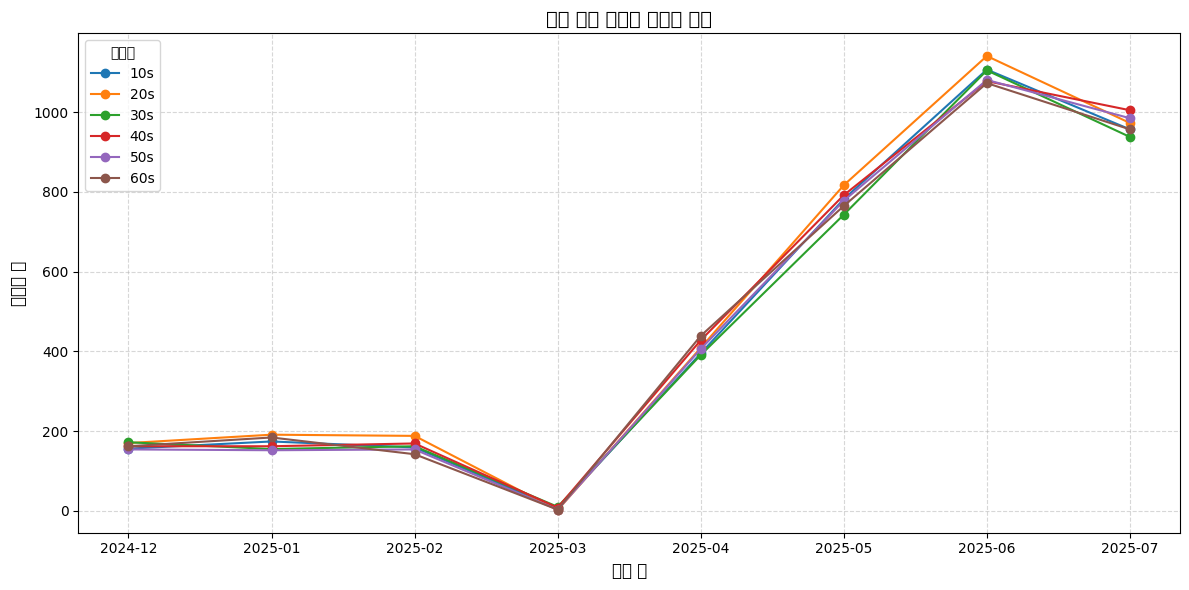

In [ ]:
# created_at을 datetime 형식으로 변환
users['created_at'] = pd.to_datetime(users['created_at'], errors='coerce')

# 월 컬럼 생성
users['month'] = users['created_at'].dt.to_period('M')

# 월별 + 연령대별 유입자 수 계산
monthly_age_distribution_all = users.groupby(['month', 'age_group']).size().unstack(fill_value=0)

# 시계열 라인 차트
plt.figure(figsize=(12, 6))
for age_group in monthly_age_distribution_all.columns:
    plt.plot(monthly_age_distribution_all.index.astype(str),
             monthly_age_distribution_all[age_group],
             marker='o', label=age_group)

plt.title('월별 전체 유입자 연령대 추이', fontsize=14)
plt.xlabel('가입 월', fontsize=12)
plt.ylabel('유입자 수', fontsize=12)
plt.legend(title='연령대')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
!pip install matplotlib
!pip install seaborn

In [ ]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 55.9 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
%matplotlib inline

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128578 (\N{SLIGHTLY SMILING FACE}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128528 (\N{NEUTRAL FACE}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128533 (\N{CONFUSED FACE}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128513 (\N{GRINNING FACE WITH SMILING EYES}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


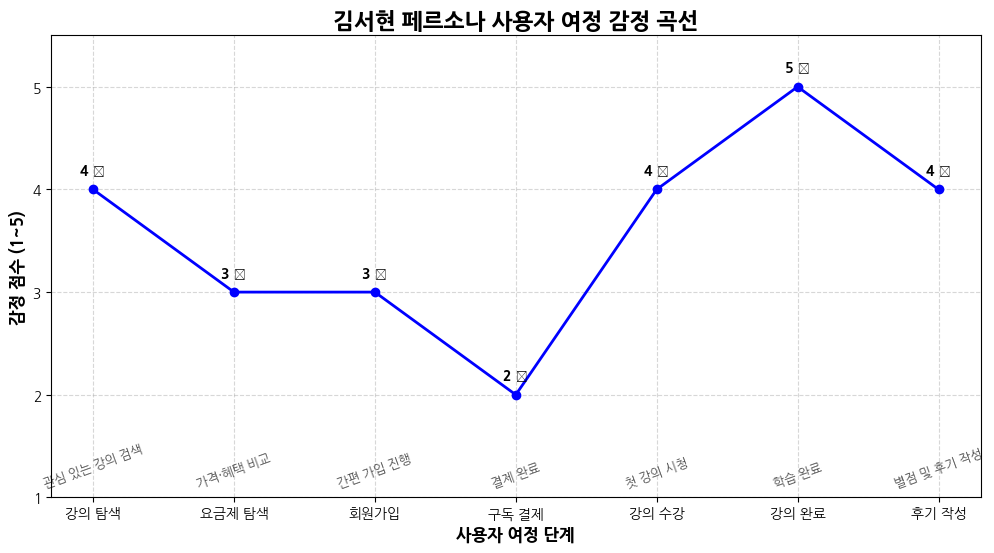

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_emotion_curve(persona_name, stages, scores, descriptions=None, emojis=None):
    """
    감정 곡선 다이어그램 생성 함수

    persona_name : str - 페르소나 이름
    stages : list - 사용자 여정 단계명
    scores : list - 각 단계별 감정 점수 (1~5)
    descriptions : list - 각 단계별 설명(옵션)
    emojis : list - 각 단계별 감정을 나타내는 이모지(옵션)
    """
    df = pd.DataFrame({
        "단계": stages,
        "감정점수": scores,
        "설명": descriptions if descriptions else [""] * len(stages),
        "이모지": emojis if emojis else [""] * len(stages)
    })

    plt.figure(figsize=(12, 6))
    plt.plot(df["단계"], df["감정점수"], marker='o', linewidth=2, color='blue')

    # 점 위에 점수+이모지 표시
    for i, val in enumerate(df["감정점수"]):
        label = f"{val} {df['이모지'][i]}"
        plt.text(i, val + 0.15, label, ha='center', fontsize=10, fontweight='bold')

    # 단계별 설명 추가
    if descriptions:
        for i, desc in enumerate(df["설명"]):
            if desc:
                plt.text(i, 1.1, desc, ha='center', fontsize=9, rotation=20, alpha=0.7)

    # 축 설정
    plt.ylim(1, 5.5)
    plt.yticks([1, 2, 3, 4, 5])
    plt.xlabel("사용자 여정 단계", fontsize=12, fontweight='bold')
    plt.ylabel("감정 점수 (1~5)", fontsize=12, fontweight='bold')

    # 제목
    plt.title(f"{persona_name} 페르소나 사용자 여정 감정 곡선", fontsize=16, fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

# 김서현 페르소나 데이터
stages = ["강의 탐색", "요금제 탐색", "회원가입", "구독 결제", "강의 수강", "강의 완료", "후기 작성"]
scores = [4, 3, 3, 2, 4, 5, 4]
descriptions = [
    "관심 있는 강의 검색",
    "가격·혜택 비교",
    "간편 가입 진행",
    "결제 완료",
    "첫 강의 시청",
    "학습 완료",
    "별점 및 후기 작성"
]
emojis = ["🙂", "😐", "😐", "😕", "🙂", "😁", "🙂"]

# 실행
plot_emotion_curve("김서현", stages, scores, descriptions, emojis)


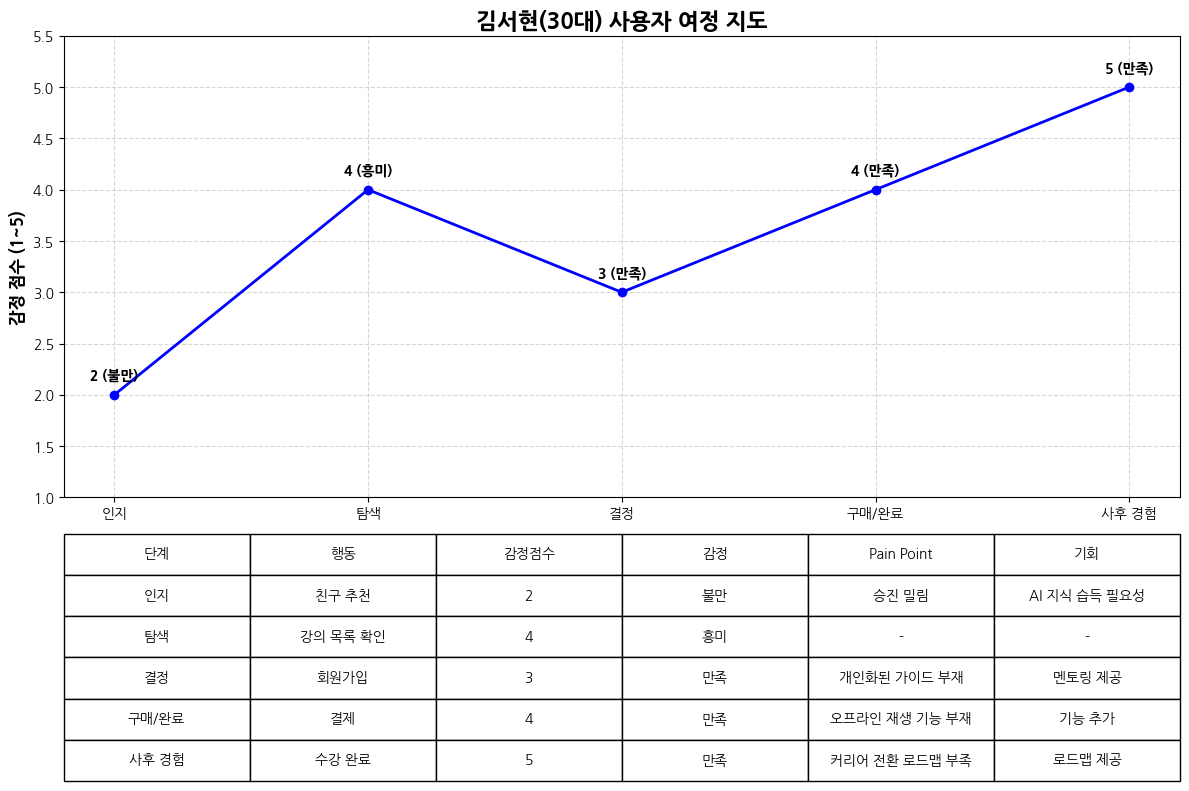

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# 데이터 준비
data = {
    "단계": ["인지", "탐색", "결정", "구매/완료", "사후 경험"],
    "행동": ["친구 추천", "강의 목록 확인", "회원가입", "결제", "수강 완료"],
    "감정점수": [2, 4, 3, 4, 5],
    "감정": ["불만", "흥미", "만족", "만족", "만족"],
    "Pain Point": [
        "승진 밀림",
        "-",
        "개인화된 가이드 부재",
        "오프라인 재생 기능 부재",
        "커리어 전환 로드맵 부족"
    ],
    "기회": [
        "AI 지식 습득 필요성",
        "-",
        "멘토링 제공",
        "기능 추가",
        "로드맵 제공"
    ]
}
df = pd.DataFrame(data)

# 시각화
fig = plt.figure(figsize=(12, 8))
gs = GridSpec(2, 1, height_ratios=[2, 1])

# 상단: 감정 곡선 그래프
ax0 = plt.subplot(gs[0])
ax0.plot(df["단계"], df["감정점수"], marker='o', linewidth=2, color='blue')
for i, val in enumerate(df["감정점수"]):
    ax0.text(i, val + 0.15, f"{val} ({df['감정'][i]})", ha='center', fontsize=10, fontweight='bold')
ax0.set_ylim(1, 5.5)
ax0.set_ylabel("감정 점수 (1~5)", fontsize=12, fontweight='bold')
ax0.set_title("김서현(30대) 사용자 여정 지도", fontsize=16, fontweight='bold')
ax0.grid(True, linestyle='--', alpha=0.5)

# 하단: 단계별 상세 표
ax1 = plt.subplot(gs[1])
ax1.axis('off')
table_data = df.values.tolist()
col_labels = df.columns.tolist()
table = ax1.table(cellText=table_data, colLabels=col_labels, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# 예시 데이터
data = pd.DataFrame({
    'source': ['회원가입(signup)', '회원가입(signup)', '유료 전환(trial_to_paid)', '유료 전환(trial_to_paid)'],
    'target': ['체험 만료(trial_expired)', '유료 전환(trial_to_paid)', '유지(paid_active)', '취소(user_canceled)'],
    'value': [300, 200, 150, 50]
})

# 노드 목록 생성
nodes = list(set(data['source'].unique()) | set(data['target'].unique()))
node_dict = {node: idx for idx, node in enumerate(nodes)}

# Sankey 데이터 변환
data['source'] = data['source'].map(node_dict)
data['target'] = data['target'].map(node_dict)

# Sankey Chart 생성
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        label=nodes
    ),
    link=dict(
        source=data['source'],
        target=data['target'],
        value=data['value']
    )
))

fig.update_layout(title_text="회원 전환 퍼널", font_size=12)
fig.show()


In [ ]:
import pandas as pd

# 파일 경로
users_path = '/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/users.csv'
plan_history_path = '/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/plan_history.csv'

# 데이터 불러오기
users = pd.read_csv(users_path)
plan_history = pd.read_csv(plan_history_path)

# 데이터 확인
users.head(), plan_history.head()


(            user_id           created_at         last_seen_at  \
 0  usr_6b87a57bd775  2025-02-09 12:50:00  2025-07-09 00:05:00   
 1  usr_b95ee57a273a  2024-12-09 20:57:00  2025-07-19 09:29:00   
 2  usr_fc7ffc4130f7  2025-01-07 02:18:00  2025-07-20 12:57:00   
 3  usr_f0dbe9c02021  2025-01-25 11:14:00  2025-07-09 03:16:00   
 4  usr_6f08473e5134  2025-01-30 02:22:00  2025-07-03 02:55:00   
 
                    email acquisition_source subscription_plan plan_status  \
 0  jinhyeonu@example.net           referral              none        none   
 1       wgim@example.com           referral        annual_pro      active   
 2   coejaeho@example.com       facebook_ads       monthly_pro      active   
 3       ngim@example.com         google_cpc       monthly_pro      active   
 4    gimujin@example.com             direct              none        none   
 
   device_type      plan_start_date plan_end_date gender age_group  age  \
 0         web                  NaN           NaN      M 

In [ ]:
# 1. 무료체험(trialing) 후 구독을 하지 않은 사용자를 이탈로 정의
# plan_history에서 trialing이 있고 이후에 active 상태가 없는 사용자 찾기

# trialing 상태 사용자
trial_users = plan_history[plan_history['plan_status'] == 'trialing']['user_id'].unique()

# active 상태 사용자
active_users = plan_history[plan_history['plan_status'] == 'active']['user_id'].unique()

# trial 이후 active가 없는 사용자 = 이탈
churn_users = [uid for uid in trial_users if uid not in active_users]

# 이탈률 계산
churn_rate = len(churn_users) / len(trial_users) * 100

# 연령대별 이탈률 계산
churn_df = users[users['user_id'].isin(trial_users)].copy()
churn_df['is_churn'] = churn_df['user_id'].isin(churn_users)

age_group_churn = churn_df.groupby('age_group')['is_churn'].mean().reset_index()
age_group_churn['is_churn'] = age_group_churn['is_churn'] * 100

# 그냥 출력
print(age_group_churn.to_string(index=False))

# 혹은 Jupyter/Colab 표 형태
from IPython.display import display
display(age_group_churn)


age_group  is_churn
      10s 72.300329
      20s 72.460824
      30s 71.876904
      40s 72.001179
      50s 70.906914
      60s 72.188995


,age_group,is_churn
0,10s,72.300329
1,20s,72.460824
2,30s,71.876904
3,40s,72.001179
4,50s,70.906914
5,60s,72.188995


In [ ]:
import pandas as pd

# 데이터 불러오기
users = pd.read_csv('/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/users.csv')
plan_history = pd.read_csv('/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/plan_history.csv')
chat_events = pd.read_csv('/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/chat_events.csv')

# 무료체험(trialing) 사용자
trial_users = plan_history[plan_history['plan_status'] == 'trialing']['user_id'].unique()

# 유료 구독(active) 사용자
active_users = plan_history[plan_history['plan_status'] == 'active']['user_id'].unique()

# 이탈자 = trial은 했으나 active가 없는 경우
churn_users = set(trial_users) - set(active_users)

# 문의 남긴 사용자(chat_events에서 'chat_sent' 같은 이벤트 확인)
# chat_events의 이벤트 컬럼 이름 파악
chat_events.columns



Index(['chat_id', 'user_id', 'sent_at', 'tag', 'emotion', 'channel', 'status'], dtype='object')

In [ ]:
# 문의를 남겼다고 가정할 수 있는 조건: status가 'sent' 또는 tag가 존재하는 경우
# 여기서는 단순히 채팅 이벤트가 1번이라도 있는 사용자로 판단
chat_users = chat_events['user_id'].unique()

# 이탈자 중 문의를 남긴 사용자
churn_with_chat = set(churn_users) & set(chat_users)

# 비율 계산
churn_inquiry_rate = (len(churn_with_chat) / len(churn_users)) * 100 if len(churn_users) > 0 else 0

churn_inquiry_rate


3.972687771570453

In [ ]:
plan_history = pd.read_csv('/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/plan_history.csv')
chat_events = pd.read_csv('/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/chat_events.csv')

In [ ]:
plan_history.info()
chat_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38999 entries, 0 to 38998
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      38999 non-null  object
 1   change_time  38999 non-null  object
 2   plan_name    7911 non-null   object
 3   plan_status  38999 non-null  object
 4   reason       38999 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2125 entries, 0 to 2124
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   chat_id  2125 non-null   object
 1   user_id  2125 non-null   object
 2   sent_at  2125 non-null   object
 3   tag      2125 non-null   object
 4   emotion  2125 non-null   object
 5   channel  2125 non-null   object
 6   status   2125 non-null   object
dtypes: object(7)
memory usage: 116.3+ KB


In [ ]:
plan_history.pivot_table(index = 'reason' , columns='plan_status', values='user_id',aggfunc='count')

plan_status,active,canceled,none,trialing
reason,,,,
existing_user,1793.0,165.0,438.0,604.0
paid_signup,49.0,NaN,NaN,NaN
signup,NaN,NaN,NaN,19545.0
trial_expired,NaN,NaN,10501.0,NaN
trial_to_paid,5618.0,NaN,NaN,NaN
user_canceled,NaN,286.0,NaN,NaN


In [ ]:
import pandas as pd

ab_assignment= pd.read_csv('/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/ab_assignment.csv')
campaigns = pd.read_csv('/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/campaigns.csv')
chat_events = pd.read_csv('/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/chat_events.csv')
event_logs = pd.read_csv('/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/event_logs.csv')
payment_transactions = pd.read_csv('/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/payment_transactions.csv')
plan_history = pd.read_csv('/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/plan_history.csv')
push_events = pd.read_csv('/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/push_events.csv')
referral_events = pd.read_csv('/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/referral_events.csv')
users = pd.read_csv('/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/users.csv')

In [ ]:
import pandas as pd

def ab_test_conversion_rate(ab_df, plan_df, experiment_name="pricing_ab"):
    """
    A/B 테스트 전환율 계산 함수
    -------------------------
    ab_df: A/B 테스트 배정 데이터 (ab_assignment.csv)
    plan_df: 플랜 변경 내역 데이터 (plan_history.csv)
    experiment_name: 분석할 실험 이름 (기본값: pricing_ab)
    """
    # 1. 실험 필터링
    exp_df = ab_df[ab_df["experiment_name"] == experiment_name][["user_id", "variant"]]

    # 2. 유료 전환 사용자 식별
    paid_users = plan_df[
        plan_df["plan_name"].notna() &
        plan_df["plan_name"].str.contains("pro", case=False) &
        (plan_df["plan_status"] == "active")
    ]["user_id"].unique()

    exp_df["converted"] = exp_df["user_id"].isin(paid_users).astype(int)

    # 3. 그룹별 집계
    summary = exp_df.groupby("variant").agg(
        users=("user_id", "count"),
        conversions=("converted", "sum")
    ).reset_index()
    summary["conversion_rate"] = (summary["conversions"] / summary["users"] * 100).round(2)

    return summary

# 사용 예시
ab_assignment = pd.read_csv("/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/ab_assignment.csv")
plan_history = pd.read_csv("/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/plan_history.csv")

result = ab_test_conversion_rate(ab_assignment, plan_history, "pricing_ab")
print(result)


  variant  users  conversions  conversion_rate
0       A    429           82            19.11
1       B    450           78            17.33


In [ ]:
# 1. 실험 데이터 필터링
pricing_ab = ab_assignment[ab_assignment['experiment_name'] == 'pricing_ab']
# 2. trial_expired 사용자 추출
trial_expired_users = plan_history[plan_history['reason'] == 'trial_expired'][['user_id']].drop_duplicates()
# 3. 실험 데이터에 전환 여부 추가
pricing_ab = pricing_ab.merge(trial_expired_users.assign(converted=1), on='user_id', how='left')
pricing_ab['converted'] = pricing_ab['converted'].fillna(0).astype(int)
# 4. 그룹별 전환율 계산
summary = pricing_ab.groupby('variant').agg(
    total_users=('user_id', 'nunique'),
    total_converted=('converted', 'sum')
).reset_index()
summary['conversion_rate'] = summary['total_converted'] / summary['total_users']
summary['conversion_rate']

,conversion_rate
0,0.634033
1,0.644444


In [ ]:
import pandas as pd

# ab_assignment.csv 불러오기
ab_df = pd.read_csv("/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/ab_assignment.csv")

# experiment_name과 variant 목록 추출
experiment_names = ab_df["experiment_name"].unique()
variants_by_experiment = {
    exp: ab_df.loc[ab_df["experiment_name"] == exp, "variant"].unique().tolist()
    for exp in experiment_names
}

experiment_names, variants_by_experiment


(array(['pricing_ab', 'onboarding_cta', 'checkout_design'], dtype=object),
 {'pricing_ab': ['A', 'B'],
  'onboarding_cta': ['test', 'original'],
  'checkout_design': ['redesign', 'control']})

In [ ]:
import pandas as pd

# 데이터 불러오기
ab = pd.read_csv('/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/ab_assignment.csv')
plans = pd.read_csv('/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/plan_history.csv')

# 실험 선택
exp = ab[ab['experiment_name'] == 'pricing_ab'][['user_id','variant','assigned_at']].copy()
exp['assigned_at'] = pd.to_datetime(exp['assigned_at'], errors='coerce')

# 유료 전환 정의
plans['change_time'] = pd.to_datetime(plans['change_time'], errors='coerce')
plans['is_paid'] = plans['plan_status'].eq('active') & plans['plan_name'].fillna('').str.contains('pro', case=False)

paid_after = (plans[plans['is_paid']][['user_id','change_time']]
              .rename(columns={'change_time':'paid_time'})
              .sort_values(['user_id','paid_time'])
              .drop_duplicates('user_id', keep='first'))

# 전환 여부 표시
exp = exp.merge(paid_after, on='user_id', how='left')
exp['converted'] = (exp['paid_time'].notna() & (exp['paid_time'] >= exp['assigned_at'])).astype(int)

# 그룹별 전환율 계산
summary = (exp.groupby('variant')['converted']
             .agg(users='count', conversions='sum')
             .reset_index())
summary['conversion_rate'] = (summary['conversions'] / summary['users'] * 100).round(2)

print(summary)


  variant  users  conversions  conversion_rate
0       A    429           82            19.11
1       B    450           78            17.33


In [ ]:
events = pd.read_csv('/content/drive/MyDrive/데이터 분석/프로젝트 4 자료/event_logs.csv')
print(events.columns)


Index(['user_id', 'session_id', 'event_name', 'event_timestamp',
       'event_properties', 'device_type', 'location'],
      dtype='object')


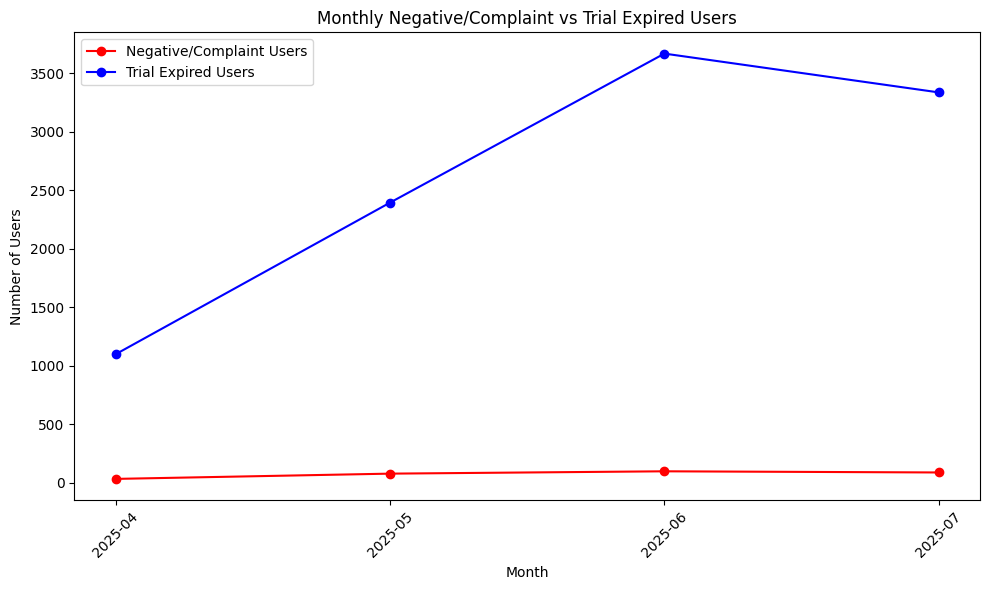

In [ ]:
# sent_at 컬럼을 사용하여 월별 집계 수행
chat_df["sent_at"] = pd.to_datetime(chat_df["sent_at"], errors="coerce")
plan_df["change_time"] = pd.to_datetime(plan_df["change_time"], errors="coerce")

# 1) negative, complaint 문의 건수 (월별 유니크 사용자 수)
neg_chat = chat_df[chat_df["tag"].str.contains("negative|complaint", case=False, na=False)].copy()
neg_chat["month"] = neg_chat["sent_at"].dt.to_period("M").astype(str)
monthly_neg = neg_chat.groupby("month")["user_id"].nunique().reset_index(name="neg_complaint_users")

# 2) trial_expired 고객 수 (월별 유니크 사용자 수)
trial_expired = plan_df[plan_df["reason"] == "trial_expired"].copy()
trial_expired["month"] = trial_expired["change_time"].dt.to_period("M").astype(str)
monthly_expired = trial_expired.groupby("month")["user_id"].nunique().reset_index(name="trial_expired_users")

# 3) 데이터 병합
df_merge = pd.merge(monthly_neg, monthly_expired, on="month", how="outer").fillna(0).sort_values("month")

# 4) 시각화
plt.figure(figsize=(10, 6))
plt.plot(df_merge["month"], df_merge["neg_complaint_users"], marker="o", label="Negative/Complaint Users", color="red")
plt.plot(df_merge["month"], df_merge["trial_expired_users"], marker="o", label="Trial Expired Users", color="blue")

plt.title("Monthly Negative/Complaint vs Trial Expired Users")
plt.xlabel("Month")
plt.ylabel("Number of Users")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
1. 그래프 읽는 방법
빨간 선 (Negative/Complaint Users)
→ 해당 월에 negative 또는 complaint 태그가 붙은 문의를 남긴 고유 고객 수
→ 고객이 경험 중 불만·부정적인 반응을 표출한 정도를 보여줌

파란 선 (Trial Expired Users)
→ 해당 월에 무료 체험이 끝났지만 유료로 전환하지 않은 고유 고객 수
→ 전환 실패(이탈) 규모를 보여줌

2. 해석 포인트
동시 급증 구간

두 선이 같은 시기에 함께 상승하면, 불만이 전환 실패와 직접적으로 연결될 가능성이 큼

예: UI 변경, 가격 정책 변경, 서비스 품질 저하 등

불만 먼저 → 전환 실패 후속

불만 건수가 먼저 오르고, 그다음 달에 trial_expired가 증가하면,
불만이 전환 실패를 예고하는 ‘선행 지표’ 역할을 할 수 있음

이탈만 증가하는 구간

trial_expired는 늘었지만 불만 건수는 변동이 없다면,
가격·혜택·경쟁사 진입 등 불만 외 요인일 수 있음

3. 활용 시사점
이탈 원인 파악: 불만과 이탈이 동반되는 시기에는 CS 로그를 세부 분석해 구체적인 원인을 찾을 필요가 있음

예방 전략: 불만 건수가 평소보다 급증하면, 전환 실패를 줄이기 위해 해당 고객군에 즉시 보완 조치를 취할 수 있음

정책 효과 검증: 개선안을 적용한 뒤 두 선이 모두 하락하는지 모니터링 가능